<a href="https://colab.research.google.com/github/pedrotorres08/CNPQuniversal/blob/main/reliable_prossumer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1- Introduction**<br>
**1.1 - Definitions**<br>
*Reliable prossumer* (RP): a low-voltage prossumer connected to the microgrid (POC MG) that has both distributed generation and distributed storage, and is able to operate off-grid for a certain period. In this project, it is assumed that the distributed generation is PV, and storage is a BESS
<br>

*   $P_{MG}$ - microgrid input power
*   $P_{BESS}$ - BESS power (optimizable)
*   $P_{IN}$ - Power of inflexible, non-critical loads
*   $P_{FN}$ - Power of flexible, non-critical loads (optimizable)
*   $P_{IC}$ - Power of inflexible, critical loads
*   $P_{FC}$ - Power of flexible, critical loads (optimizable)
*   $P_{DPV}$ - Distributed PV power
<br><br>
Here we define a flexible load those that have a certain degree of flexibility in its operation scheduling on a day-ahead basis (opposing to inflexible ones) and critical loads are those that for a given day-ahead schedule MUST operate irrespective of external source availability (i.e. MG), while non-critical loads are not constrained in this regard. Load classification varies from user-specific needs, but some examples can be given:<br>
*   Inflexible, non-critical: lighting 
*   Flexible, non-critical: entertaining (TV, etc)
*   Inflexible, critical: PC + internet for home office
*   Flexible, critical: electric shower
<br><br>

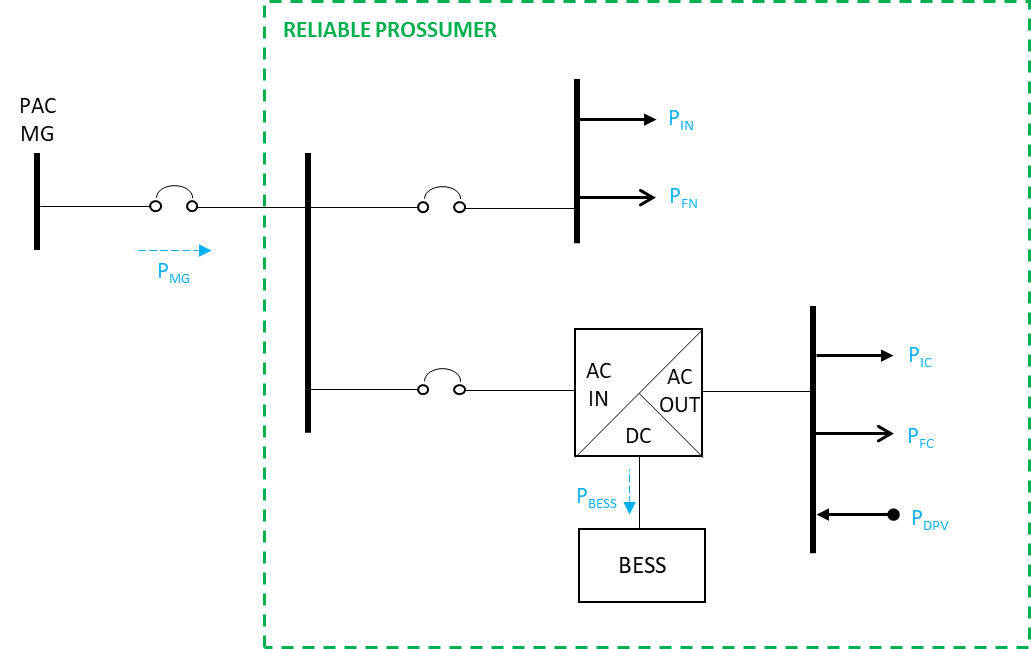
Power balance equation (time index omitted):<br>
$P_{MG}  = P_{BESS} + P_{FC} +  P_{IC} +  P_{FN} +  P_{IN} - P_{DPV}$<br>

**1.2 - Cost Function**<br>
The prossumer energy contract with the microgrid supplier is based on a day-ahead TOU tariff scheme, and also accounts the reliability of supply:
<br>
$C_{ES,t} = r_{t}*k_{t}*P_{MG,t} - p_{t}*r_{t}$<br>
Where:<br>
*   $C_{ES,t}$ - cost of energy supply, at a given time t<br>
*   $r_{t}$ - probability of guaranteed service at a given time t<br>
*   $p_{t}$ - penalty factor due unavailability of supply<br>
*   $k_{t}$ - energy supply tariff, at a given time t, in $/kW<br>

$r_{t}$ is the probability of guaranteed service by the energy supply provider (ESP), on a TOU day-ahead basis, where $r_{t} = 1$ indicates that the ESP is 100 % confident that service will be available at a given time t in the next day. When a severe storm is forecasted, for instance, the ESP might reduce its confidence in service, thus adjusting $r_{t}$.<br>
$p_{t}$ is the penalty factor that accounts for interruptions in energy supply. This can be understood as a discount applied to the overall energy supply cost whenever service is interrupted. As $p_{t}$ is multiplied by $r_{t}$ the ESP is incentivized to determine accurate values for $r_{t}$ which in turn is an important input for the prossumer local energy scheduling.

**1.3 - Energy Management Controller**<br>
The RP energy management controller (EMC) schedules/dispatches the following variables: $P_{BESS}$, $P_{FC}$, $P_{FN}$. While $P_{DPV}$, $P_{IC}$, $P_{IN}$ are inputs that must be internally forecasted by the RP EMC. $r_{t}$, $p_{t}$ and $k_{t}$ are inputs external to the RP.

## **2 - Optimization model**
**2.1 - Cost Function**<br>
$min(\sum_{t=1}^n C_{ES,t})$<br>where $n$ is the number of timeslots for daily simulation (e.g. $n = 24$ for an hourly timestep)<br><br>

**2.2 - Inputs**<br>
$r_{t}$, $p_{t}$, $k_{t}$, $P_{DPV,t}$, $\sum_{i=1}^{N_{IC}}P_{IC,i,t}$, $\sum_{i=1}^{N_{IN}}P_{IN,i,t}$<br>
where $N_{IN}$ is the number of inflexible, non-critical loads, and $N_{IC}$ is the number of inflexible, critical loads. <br><br>

**2.3 - Optimizing Variables**<br>
$P_{BESS,t}$, $\sum_{i=1}^{N_{FC}}P_{FC,i,t}$, $\sum_{i=1}^{N_{FN}}P_{FN,i,t}$<br>
where $N_{FN}$ is the number of flexible, non-critical loads, and $N_{FC}$ is the number of flexible, critical loads. <br><br>

**2.4 - Constraints**<br>


## **3 - Implementation**